In [1]:
import cv2

import numpy as np


import sys
import os

In [2]:
# !ls sample/3-2/input.png

In [3]:
os.listdir()
# os.getcwd()
# sys.path

['gray1.jpg',
 'sample',
 'hsv2.jpg',
 '.ipynb_checkpoints',
 '332.ipynb',
 '341.ipynb']

In [4]:
def main():
    img = cv2.imread("./sample/3-2/input.png")
    
    height, width, ch = img.shape
    
    size = width * height

    # 情報表示
    print("幅", width)
    print("高さ",height)
    print("チャンネル数", ch)
    print("画素数", size)
    print("データ型", img.dtype)
    print("Bの画素値\n", img[0])
    print("Gの画素値\n", img[1])
    print("Rの画素値\n", img[2])
    
    
    

In [5]:
main()

幅 3
高さ 3
チャンネル数 3
画素数 9
データ型 uint8
Bの画素値
 [[ 35  12 255]
 [ 43 198   0]
 [221  43  50]]
Gの画素値
 [[  0   0   0]
 [255 255 255]
 [209 225 226]]
Rの画素値
 [[200  87 174]
 [  0   0 255]
 [  0   0   0]]


## 3.3

In [6]:
# 3-3-1

import cv2

def rgb_to_gray(src) :
    r, g, b = src[:,:,0], src[:,:,1], src[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    
    return gray

def main():
    img = cv2.imread("./sample/3-3/input.jpg")
    
    gray1 = rgb_to_gray(img)
    
    cv2.imwrite("gray1.jpg", gray1)
    

    

In [7]:
main()

In [8]:
!ls

332.ipynb  341.ipynb  gray1.jpg  hsv2.jpg  sample


In [9]:
# nimg= np.array( "./gray1.jpg")

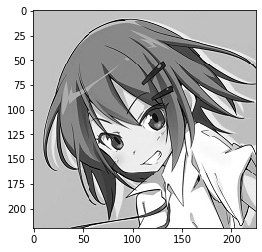

In [16]:
##自分の遊び

import matplotlib.pyplot as plt
from PIL import Image

im = Image.open("./gray1.jpg")

im_n = np.asarray(im)

#
im_n = cv2.cvtColor(im_n, cv2.COLOR_BGR2RGB)

plt.imshow(im_n)

plt.show()

## 3-3-2

In [13]:
import cv2
import numpy as np


def rgb_to_hsv(src, ksize = 3) :
    h, w, c = src.shape

    dst = np.empty((h, w, c))
    
    for y in range(0, h):
        for x in range(0, w):
            # RGBの値を取得して0~1の範囲にする
            [b, g, r] = src[y][x]/255
            
            # R,G,Bの値から最大値と最小値を計算
            mx, mn = max(r,g,b), min(r,g,b)
    
            diff = mx - mn

            # Hの値を計算
            if mx == mn :
                h = 0
            elif mx == r:
                h = 60 * ((g-b)/ diff)
                
            elif mx == g:
                h = 60 * ((b-r)/ diff) + 120
                
            elif mx == b:
                h = 60 * ((r-g)/ diff) + 240
            
            if h < 0:
                h = h + 360
                
            if mx != 0:
                s = diff / mx
            else:
                s = 0
                
            # Vの値を計算
            v = mx
            
            # HSVを0~255にして格納
            dst[y][x] = [h, s * 255, v * 255]

In [14]:
import cv2

import numpy as np

def main332():
    img = cv2.imread("./sample/3-3/input.jpg")
    
    hsv2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # 結果を出力
    cv2.imwrite("hsv2.jpg",hsv2)
    

    

In [15]:
main332()